# Proyecto 1: Algortimos Computacionales

# Mateo Calderón Vargas

In [1]:
using Luxor

In [2]:
function Sierpinsky() #definimos una función en la que metemos los parámetros
    width  = 1000
    height = 1000
    Drawing(width, height, "./Sierpinsky.png") #Con la función Drawing guardamos un dubujo de la figura
    t = Turtle(0, 0, true, 0, (0., 0., 0.))
    x = rand(1:width) #le asignamos un número aleatorio entre 1:1000 a la variable x ^ y
    y = rand(1:height)
 
    for l in 1:30000 #comenzamos un ciclo con 30,000 iteraciones
        v = rand(1:3) #escogemos un número aleatorio entre  1:3 que serán los vertices
        if v == 1
            x /= 2 # Con el operador /= le decimos que divida el valor izquierdo con el derecho y se lo asigne al de la izquierda
            y /= 2
        elseif v == 2
            x = width/2 + (width/2 - x)/2 #tomamos la mitad de la distancia entre el punto (x, y) y el vértice
            y = height - (height - y)/2
        else
            x = width - (width - x)/2
            y = y / 2
        end
        Reposition(t, x, height-y) 
        Circle(t, 3)
    end
end

Sierpinsky (generic function with 1 method)

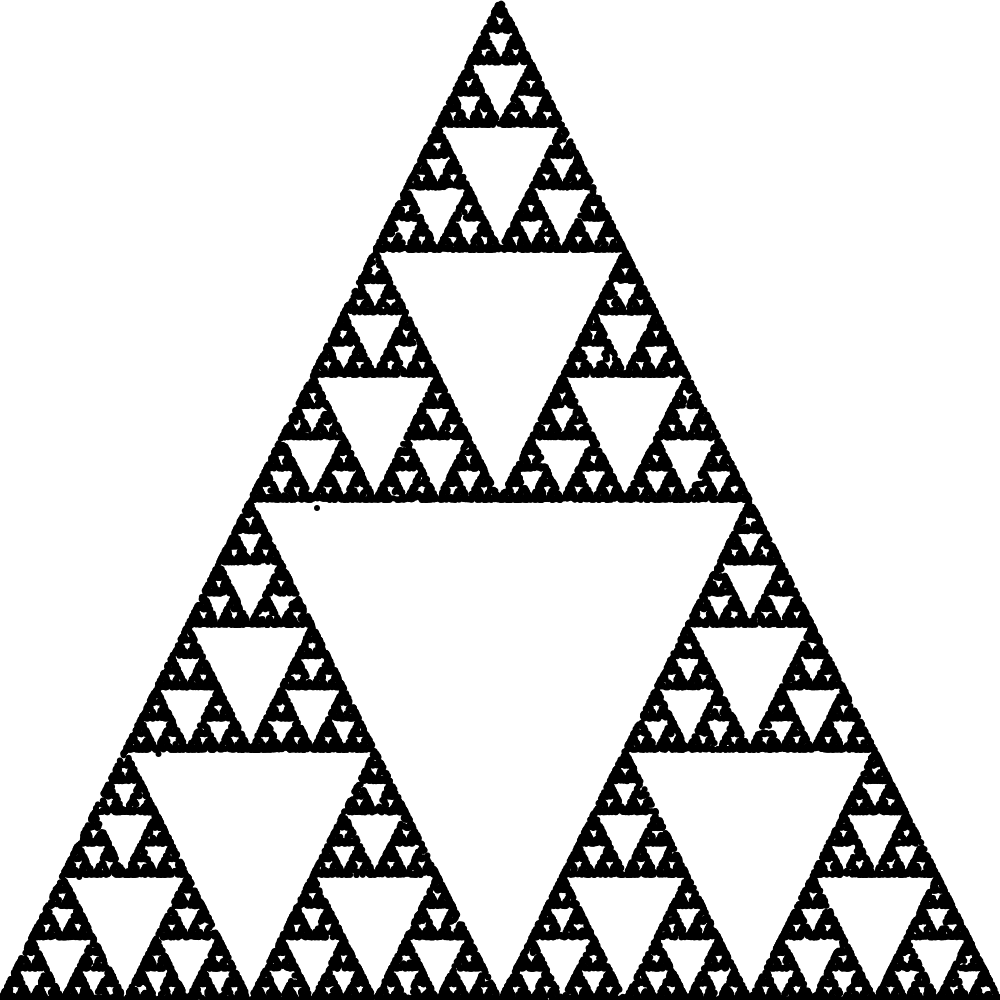

In [3]:
Sierpinsky()
finish()
preview() # Abrimos el archivo que guardamos como Sierpinsky.png

Código para calcular Pi de forma aproximada

In [4]:
using Plots

In [5]:
gr()

Plots.GRBackend()

In [6]:
n = 15000 #le asignamos el número de iteraciones que queremos a la variable n

x = [rand()* rand((-1,1)) for _ in 1:n]

y = [rand()* rand((-1,1)) for _ in 1:n]

circle = [x[i]^2 + y[i]^2 <= 1 for i in 1:n]

circle_sum = Int64[]

push!(circle_sum, circle[1])

for i in 1:(n-1)
    new_sum = circle_sum[i] + circle[i+1]
    push!(circle_sum, new_sum)
end

In [7]:
pi_est = [4* circle_sum[i]/i for i in 1:n]

15000-element Vector{Float64}:
 4.0
 2.0
 2.6666666666666665
 2.0
 2.4
 2.0
 2.2857142857142856
 2.5
 2.2222222222222223
 2.0
 1.8181818181818181
 1.6666666666666667
 1.8461538461538463
 ⋮
 3.1628527586897057
 3.162908605737158
 3.162964445333867
 3.163020277481323
 3.1628093110118054
 3.1625983726824063
 3.162654218072691
 3.1627100560149373
 3.1627658865106354
 3.1628217095612747
 3.1628775251683448
 3.162933333333333

In [8]:
function circle_shape(h, k, r)
    θ = LinRange(0, 2*π, 500)
    0 .+ r*sin.(θ), k .+ r*cos.(θ)
end

plot(circle_shape(0, 0, 1), fillalpha=0.0, legend=false, aspect_ratio=1, linewidth=5)
scatter!(x, y, legend=false, linewidth=0.2, markersize=1)

Usaremos otro método para el ejercicio de aproximación de pi por método de Montecarlo

In [9]:
using Statistics

In [10]:
function estimate_pi(nMC) #definimos una función a la que le damos como argumento, el número de puntos que genere
           radius = 1.
           diameter = 2. * radius
           n_circle = zeros(Int,Threads.nthreads())
           Threads.@threads for i in 1:nMC
               x = (rand() - 0.5) * diameter
               y = (rand() - 0.5) * diameter
               r = sqrt(x^2 + y^2)
               if r <= radius
                   n_circle[Threads.threadid()] += 1
               end
           end
           return (sum(n_circle) / nMC) * 4.
       end

estimate_pi (generic function with 1 method)

## Gráfica para ver el error de estimación, respecto al número de puntos  

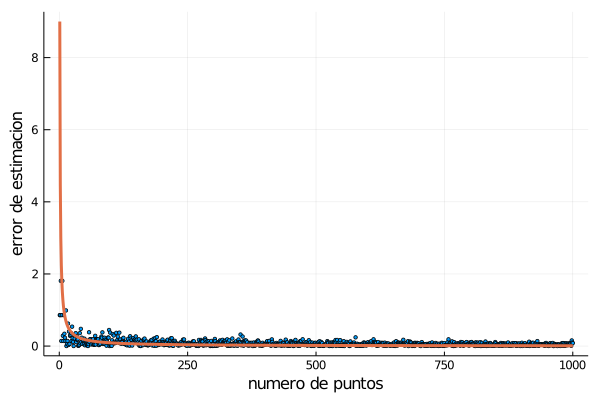

In [26]:
stan_err = []
num_puntos = [1:1000]

for i in 1:1000
    k = estimate_pi(i)
    error = abs(k .- π)
    push!(stan_err, error)
end

scatter(num_puntos, stan_err, legend=false, xlabel="numero de puntos", ylabel="error de estimacion", 
    markersize=2)

x = 0:1:1000
f(x) = (3/x)
y = f.(x)
plot!(x, y, label="linea de tendencia", linewidth=3)

## Segunda gráfica para ver el error de estimación

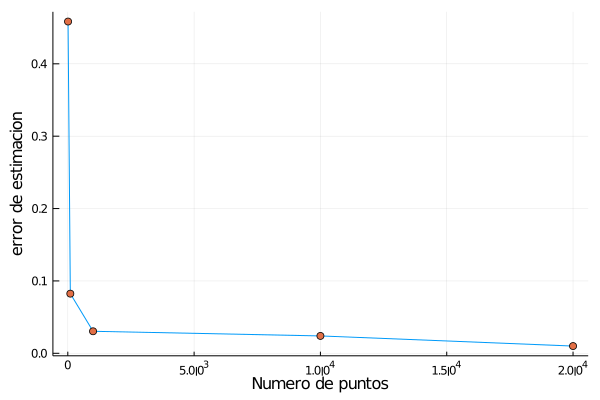

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to un

In [12]:
n1 = estimate_pi(10)
n2 = estimate_pi(500)
n3 = estimate_pi(1000)
n4 = estimate_pi(10000)
n5 = estimate_pi(20000)

array1 = [n1,  π]
array2 = [n2,  π]
array3 = [n3,  π]
array4 = [n4,  π]
array5 = [n5,  π]

y1 = abs(n1-π)
y2 = abs(n2-π)
y3 = abs(n3-π)
y4 = abs(n4-π)
y5 = abs(n5-π)

est_err = [(10, y1), (100, y2), (1000, y3), (10000, y4), (20000, y5)]

plot(est_err, legend=false)
scatter!(est_err, legend=false, xlabel="Numero de puntos", ylabel="error de estimacion")
